# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

The purpose of this project aims to predict future job salaries based on a dataset of one million observations of current job postings.  Python will be used for analysis.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__author__ = "John Samson"
__email__ = "samson.john@gmail.com"

## Part 2 - DISCOVER

### Loading the data

In [2]:
# Loading files into pandas dataframe
df_train_features = pd.read_csv(r'C:\Users\oscar\Desktop\Data Science\DataScienceProjects\SalaryPrediction\data\train_features.csv')
df_train_target = pd.read_csv(r'C:\Users\oscar\Desktop\Data Science\DataScienceProjects\SalaryPrediction\data\train_salaries.csv')
df_test_features = pd.read_csv(r'C:\Users\oscar\Desktop\Data Science\DataScienceProjects\SalaryPrediction\data\test_features.csv')

### Examining and Cleaning the Data 

In [3]:
# Defining a function for initial data analysis
def examine_df(df):
    print(df.info())
    
    # Return a few rows
    print('\n')
    print('First five rows')
    print('--------------------')
    print(df.head())
    
    # Return descriptive information of the dataframe
    print('\n\n Descriptive Information for Numerical Variables')
    print('--------------------')
    print(df.describe(include = [np.number]))
    print('\n\n Descriptive Information for Categorical Variables')
    print('--------------------')
    print(df.describe(include = ['O']))
    
    # Check for duplicates
    print('\n\n Number of Duplicate Values = ', df.duplicated().sum())

In [4]:
examine_df(df_train_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None


First five rows
--------------------
              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHY

In [5]:
examine_df(df_train_target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None


First five rows
--------------------
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163


 Descriptive Information for Numerical Variables
--------------------
               salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000


 Descriptive Information for Categorical Variables
--------------------
                   jobId
count            1000000
unique           1000000
top     JOB1362684727904
freq                   1


 Nu

**Observation:** 

- There are no null values and no duplicates for the two 'train' dataframes.  
- All variables seem reasonable except for 'salary' (check for potential outliers)

In [6]:
# Merging the training dataframes for further analysis
train_df = pd.merge(df_train_features, df_train_target, on = 'jobId')

# Renaming columns 
train_df.rename({'jobId' : 'job_id',
                'companyId' : 'company_id',
                'jobType' : 'job_type',
                'yearsExperience' : 'years_experience',
                'milesFromMetropolis' : 'miles_from_metropolis'}, axis = 1, inplace = True)

df_test_features.rename({'jobId' : 'job_id',
                'companyId' : 'company_id',
                'jobType' : 'job_type',
                'yearsExperience' : 'years_experience',
                'milesFromMetropolis' : 'miles_from_metropolis'}, axis = 1, inplace = True)

train_df.head()

,job_id,company_id,job_type,degree,major,industry,years_experience,miles_from_metropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Analyzing Outliers

In [7]:
# Defining outlier criteria using IQR
summary = train_df['salary'].describe()
IQR = summary['75%'] - summary['25%']
upper_bound = summary['75%'] + 1.5 * IQR
lower_bound = summary['25%'] - 1.5 * IQR

print('Lower Outlier Threshold = ', lower_bound)
print('Upper Outlier Threshold = ', upper_bound)

Lower Outlier Threshold =  8.5
Upper Outlier Threshold =  220.5


In [8]:
# Analyzing entries outside outlier threshold
print('Number of rows below lower bound = ', train_df[train_df['salary'] < lower_bound].shape[0])
print('Number of rows above upper bound = ', train_df[train_df['salary'] > upper_bound].shape[0])

Number of rows below lower bound =  5
Number of rows above upper bound =  7117


**Observation:**

Although the percent of rows with outlier salaries is only a small percentage (0.7%) of the entire dataframe, we will analyze the outliers to see which rows should be kept and discarded.  We will analyze outliers based on `job_type`.

In [9]:
# Lower bound outliers
train_df[train_df['salary'] < lower_bound]

,job_id,company_id,job_type,degree,major,industry,years_experience,miles_from_metropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [10]:
# Upper bound outliers
train_df[train_df['salary'] > upper_bound]['job_type'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: job_type, dtype: int64

In [11]:
# We can hypothesize that 'Junior' roles should not be paid above $220,500.
# We will check these roles for anomalies
train_df[(train_df['salary'] > upper_bound) & (train_df['job_type'] == 'JUNIOR')]

,job_id,company_id,job_type,degree,major,industry,years_experience,miles_from_metropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


**Observation:** 
- For jobs with salaries = 0, we can deduce that these are not volunteer positions or internships.  Corrupt data is present and we will remove these rows from the training dataframe.  
- For `JUNIOR` roles paid greater than the upper_bound threshold, we see that all but one of these jobs requie a Master's degree or higher.  Also, the industries in this data are primarily Oil or Finance, with one instance of Web.  Since these industries can have lucrative pay, there is a possibility that `JUNIOR` roles can be paid such a large amount.  Therefore, we will not drop these rows.

In [12]:
# Keeping desired data
train_df = train_df[train_df['salary'] > lower_bound]

# Checking results (5 rows show be removed)
print('Number of rows in new dataframe =', train_df.shape[0])

Number of rows in new dataframe = 999995


In [13]:
# Copy dataframe for use in modeling (Part 3)
clean_model_train_df = train_df.copy()
clean_model_train_df.shape

(999995, 9)

## Explorartory Data Analysis

In [14]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [15]:
# Cateogrizing variables into different groups
# job_id not included because each ID is unique and will not be helpful for analysis

numerical_features = ['years_experience', 'miles_from_metropolis']
categorical_features = ['company_id', 'job_type', 'degree', 'major', 'industry']
target = ['salary']

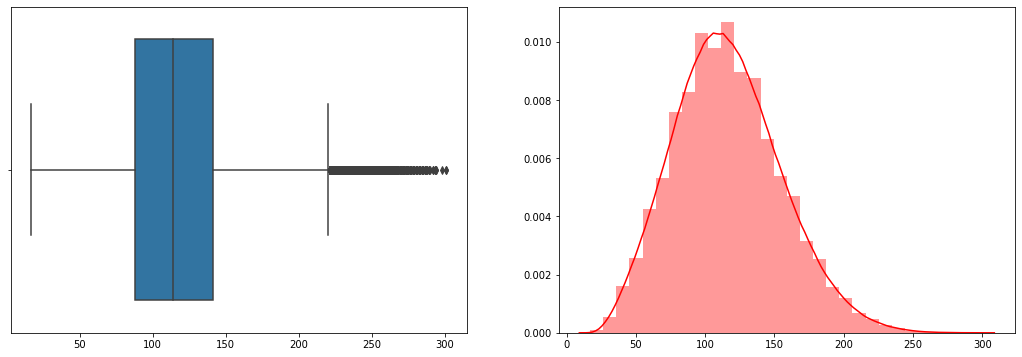

In [16]:
# Visualizing the target variable

plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(train_df[target])
plt.subplot(1, 2, 2)
sns.distplot(train_df[target], color = 'red', bins = 30)
plt.show()

**Observation:** `Salary` is right-skewed but has a shape of a normal distribution

In [17]:
def plot(df,col):
    plt.figure(figsize=[14,8])
    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean().plot()
        plt.xlabel(col)
        plt.ylabel("Mean Salary")
        plt.xlabel(col.upper().replace('_', ' '), fontsize = 16)
        plt.ylabel('AVERAGE SALARY($), IN 1000s', fontsize = 16)
        plt.title('{} vs. AVERAGE SALARY'.format(col.upper().replace('_', ' ')), fontsize = 20)
        plt.show()
        
    else:
        mean = df.groupby(col)['salary'].mean().sort_values(ascending = True).index
        sns.boxplot(x = col, y = 'salary', data = df, order = mean, palette = 'Set2') 
        plt.xticks(rotation = 30)
        plt.xlabel(col.upper().replace('_', ' '), fontsize = 16)
        plt.ylabel('SALARY($), IN 1000s ', fontsize = 16)
        plt.title('{} vs. SALARY'.format(col.upper().replace('_', ' ')), fontsize = 20)
        plt.show()

### Plots (Categorical Variables vs. Target)

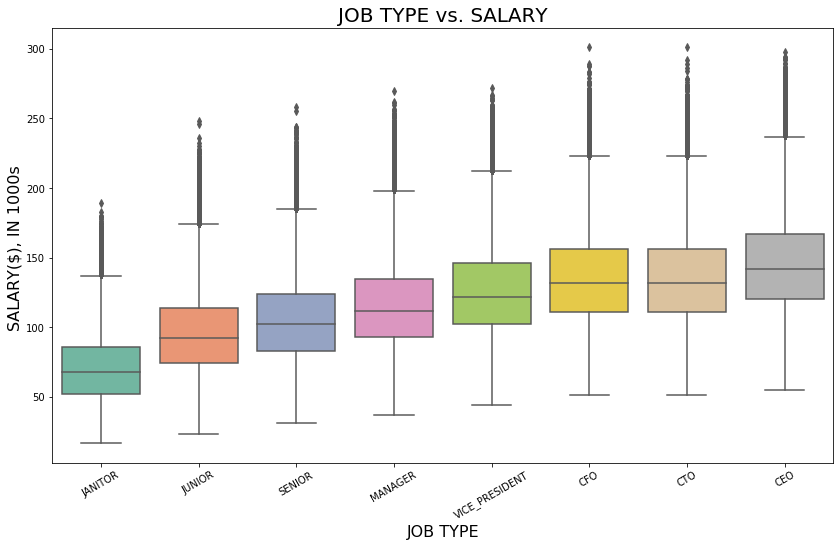

In [18]:
plot(train_df, 'job_type')

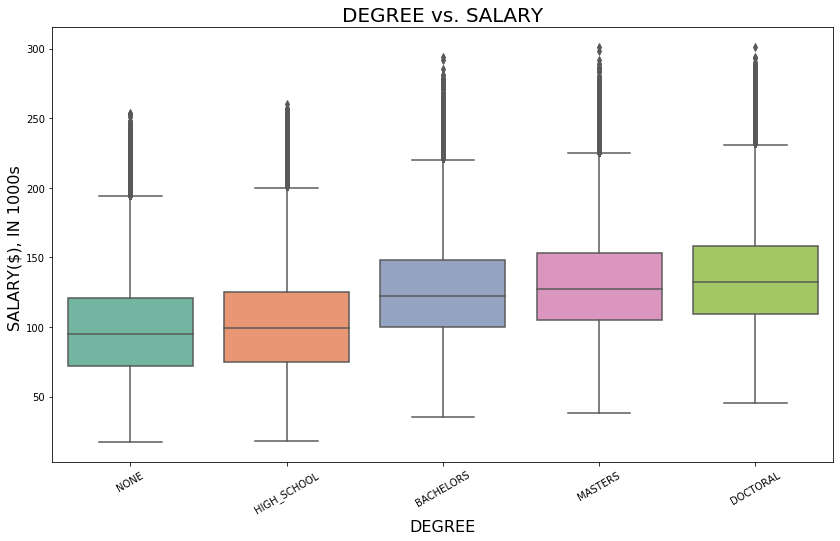

In [19]:
plot(train_df, 'degree')

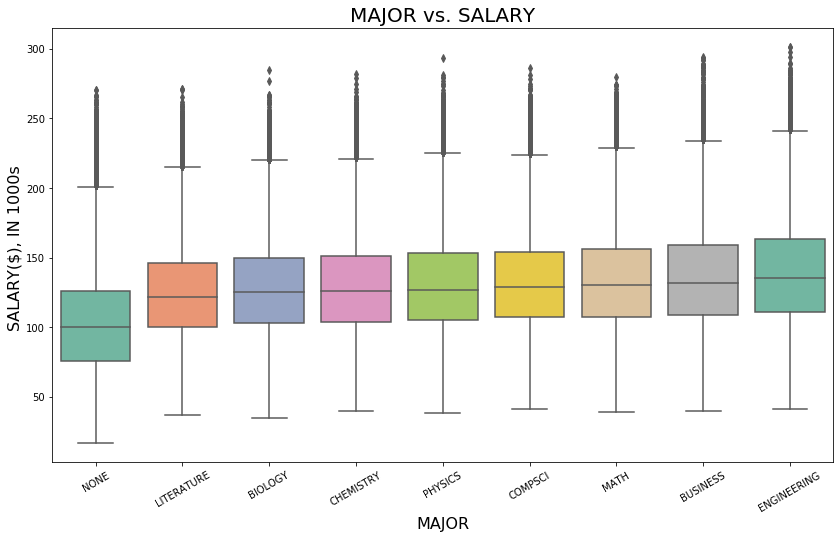

In [20]:
plot(train_df, 'major')

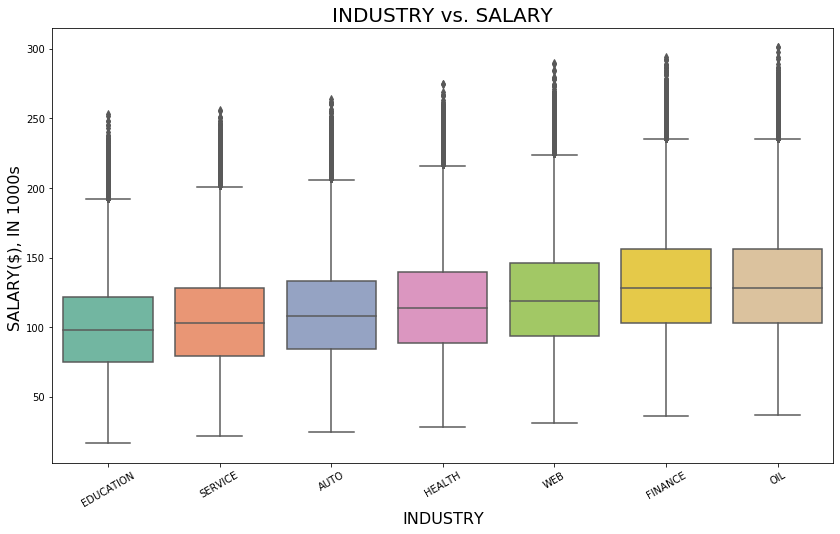

In [21]:
plot(train_df, 'industry')

**Obseravation:**

- For job titles, CEOs are paid the highest and Janitors are paid the lowest.  The difference in mean salary is about 70K.  
- For degree type, jobs requiring a Bachelor's Degree and above are paid relatively similar.  However, there is a big dropoff compared to no degree and a high school diploma.  The salary difference between these two groups is about 30K.
- For major, there is minimal difference between salary and chosen major.  However there is a significant dropoff with those not choosing a major. People without a chosen major have an average salary 30K lower than those who chose a major.
- For industry, Oil and Finance have the highest salaries while Education has the lowest salary.  The difference between highest to lowest industries is about 30K.

### Plots (Numerical Variables vs. Target)

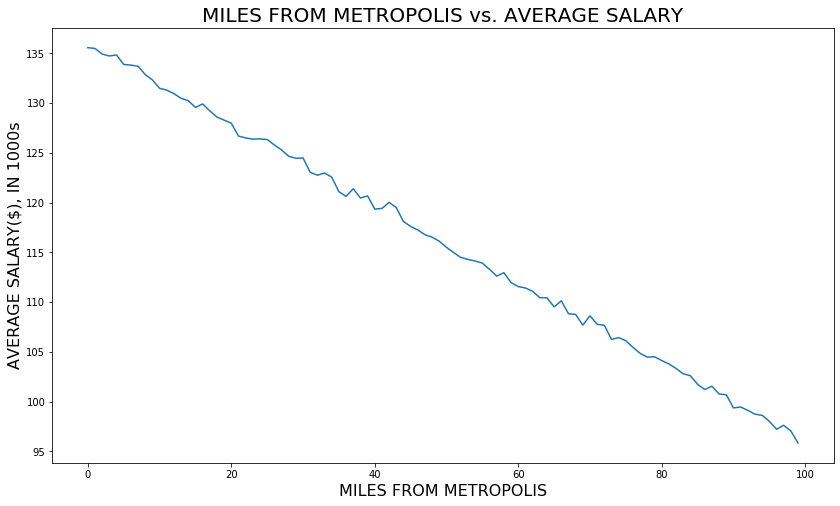

In [22]:
plot(train_df, 'miles_from_metropolis')

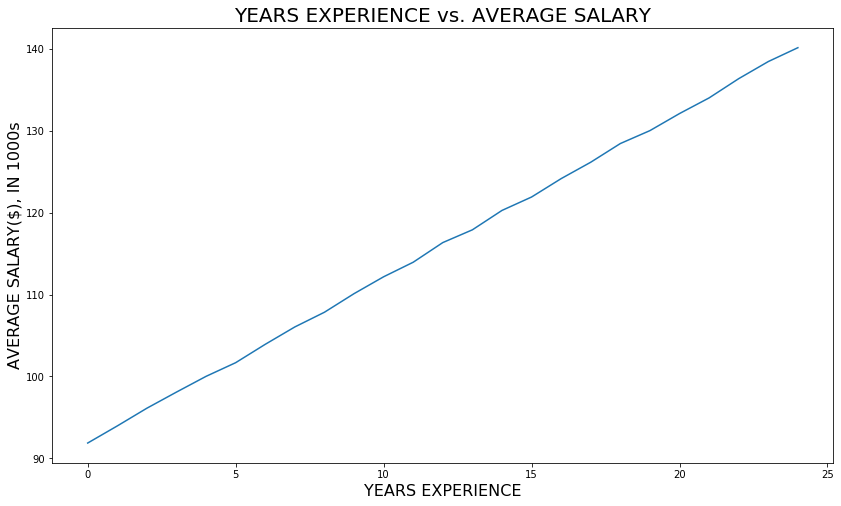

In [23]:
plot(train_df, 'years_experience')

**Observation:**

- Miles from Metropolis and Average Salary have a negatively-correlated linear relationship.  Salaries generally decrease as we move away from a metropolis location.
- Year Experience and Average Salary have a positively-correlated linear relationship.  More years experience generally leads to an increase in salary.  

### Checking Sample Balance

In [24]:
for cat in categorical_features:
    train_df[cat] = train_df[cat].astype('category')

In [25]:
# Encoding cateorical variables to replace label with average salary of category
def encode_label(df, col):
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = df[df[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [26]:
# Executing the changes
for col in train_df.columns:
    if train_df[col].dtype.name == 'category':
        encode_label(train_df,col)

In [27]:
# Changing format for some columns
for feature in categorical_features:
    train_df[feature] = train_df[feature].astype(float)
    train_df[feature] = train_df[feature].round(2)

In [28]:
# Showing that categorical labels have been replaced with category averages
train_df.head()

,job_id,company_id,job_type,degree,major,industry,years_experience,miles_from_metropolis,salary
0,JOB1362684407687,115.35,135.46,130.51,133.32,115.74,10,83,130
1,JOB1362684407688,115.76,145.31,101.92,102.58,121.65,3,73,101
2,JOB1362684407689,116.22,125.37,135.49,130.37,115.74,10,38,137
3,JOB1362684407690,116.20,115.37,135.49,129.07,109.44,8,17,142
4,JOB1362684407691,115.89,125.37,125.45,130.37,130.75,8,16,163


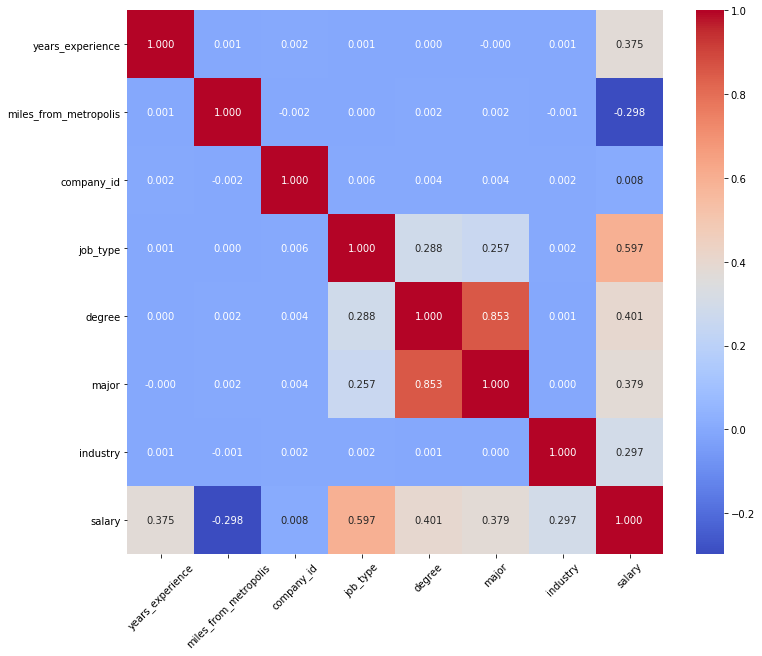

In [29]:
#Creating a correlation heatmap of all features and target variable
combined_features = numerical_features + categorical_features + target

fig = plt.figure(figsize = (12, 10))
sns.heatmap(train_df[combined_features].corr(), cmap = 'coolwarm', annot = True, fmt = '0.3f')
plt.xticks(rotation = 45)
plt.show()

**Observation:**

The correlation heatmap shows the following relationships:

- All features except company_id affect the target variable (salary) in a significant way.  This makes sense with our plots above which show some variance with each feature with respect to salary.  Job type is the feature that affects salary the strongest.  
- There is a strong relationship between degree and major.  This makese sense since people without a college degree (i.e. None or High School) will not have a major in college.  This could explain why there is a large number of job postings with 'No Major Listed'.  

### Establish a Baseline for Modeling Purposes

In [30]:
# Since there is a significant relationship between salary and miles_from_metropolis, we will
# do a simple linear regression using these variables as a baseline model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
simple_lr = LinearRegression()
simple_lr.fit(train_df[['miles_from_metropolis']], train_df['salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Defining cross validation function for multiple models (k = 5 folds)
def cross_validation(model, features, target):
    result = cross_val_score(model, features, target, cv = 5, scoring = 'neg_mean_squared_error')
    print('\n Model:', model)
    print('\n Average MSE: ' + str(-result.mean()))
    print('\n Standard Deviation during cross-validation: ' + str(result.std()))

In [32]:
cross_validation(simple_lr, train_df[['miles_from_metropolis']], train_df['salary'])


 Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Average MSE: 1366.1887433332208

 Standard Deviation during cross-validation: 4.098671089321314


**Observation:**
Our MSE value is relatively high for a baseline model.  We will create three other models to reduce MSE even further:

1. Linear Regression - Since our numerical features showed a relatively linear relationship, a linear regression model with more features will be approriate to use.
2. Random Forest - This model is good for highlighting which features affect the targer variable the most.
3. Gradient Boosting - This model works well with linearly-related features and contains tuning parameters which can ideally reduce MSE.

## Part 3 - DEVELOP

In [33]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Define Functions for Model Development

In [34]:
# Function to perform one hot encoding on categorical variables and combine with numerical variables
def one_hot_encode(df, categorical_vars = None, numeric_vars = None):
    categorical_df = pd.get_dummies(df[categorical_vars])
    numeric_df = df[numeric_vars].apply(pd.to_numeric)
    return pd.concat([categorical_df, numeric_df], axis=1)

# Function to return dataframe of target variable(s)
def get_target(df, target_var):
    return df[target_var]

# # Function to train chosen models
# def train_model(model, train, target, number_processes, mean_mse, cross_val_std):
#     neg_mse = cross_val_score(model, train, target ,cv = 5 ,n_jobs = number_processes,
#                               scoring = "neg_mean_squared_error")
#     mean_mse[model] = -1.0 * np.mean(neg_mse)
#     cross_val_std[model] = np.std(neg_mse)
    
# def print_summary(model ,mean_mse , cross_val_std):
#     print('\n Model:', model)
#     print('\n Average MSE:', mean_mse[model])
#     print('\n Standard Deviation during cross-validation:', cross_val_std[model])

### Preparing Model Data

In [35]:
# Shuffling training dataframe to randomize and possibly improve cross-validation accuracy
random_train_df = shuffle(clean_model_train_df).reset_index()

# Encoding categorical data and finalzing features for train and test dataframes
train_model_df = one_hot_encode(random_train_df, categorical_vars = categorical_features , numeric_vars = numerical_features)
test_model_df = one_hot_encode(df_test_features, categorical_vars = categorical_features , numeric_vars = numerical_features)

# Defining target dataframe
target_df = get_target(random_train_df, target)


### Testing the Models

In [36]:
# Linear Regression
lr = LinearRegression()
lr.fit(train_model_df, target_df)
lr_metrics = cross_val_score(lr, train_model_df, target_df, cv = 5, scoring = 'neg_mean_squared_error')
lr_mse = -1 * lr_metrics.mean()
lr_std = lr_metrics.std()

print('Model:', lr)
print('\nAverage MSE:', lr_mse)
print('\nStandard Deviation during cross-validation:', lr_std)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Average MSE: 384.44443594502616

Standard Deviation during cross-validation: 0.9173765040608287


In [51]:
# Random Forest

rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, max_depth = 10, max_features = 30, 
                           verbose = 0, min_samples_split = 60)
rf_metrics = cross_val_score(rf, train_model_df, target_df, cv = 5, scoring = 'neg_mean_squared_error')
rf_mse = -1 * rf_metrics.mean()
rf_std = rf_metrics.std()

print('Model:', rf)
print('\nAverage MSE:', rf_mse)
print('\nStandard Deviation during cross-validation:', rf_std)

#37 minute run time

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

Average MSE: 444.66112407717037

Standard Deviation during cross-validation: 1.6972080020648648


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [54]:
#Gradient Boosting

gb = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, loss = 'ls', learning_rate = 0.1, verbose = 1)
gb.fit(train_model_df, target_df)
gb_metrics = cross_val_score(gb, train_model_df, target_df, cv = 5, scoring = 'neg_mean_squared_error')
gb_mse = -1 * gb_metrics.mean()
gb_std = gb_metrics.std()

print('Model:', gb)
print('\nAverage MSE:', gb_mse)
print('\nStandard Deviation during cross-validation:', gb_std)

# Run time = 2 hours, 43 min

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        1351.2830           33.42m
         2        1229.8976           33.49m
         3        1129.7084           33.34m
         4        1045.3752           32.77m
         5         974.4283           32.26m
         6         914.9446           32.30m
         7         862.6779           31.94m
         8         814.8460           31.45m
         9         772.9795           31.15m
        10         737.2014           30.77m
        20         519.7989           27.52m
        30         434.7553           24.57m
        40         397.1956           22.36m
        50         379.5808           18.39m
        60         370.1295           14.59m
        70         364.8456           10.87m
        80         361.7159            7.18m
        90         359.4911            3.62m
       100         357.9892            0.00s


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        1350.3283           37.39m
         2        1228.9813           36.16m
         3        1128.6850           32.38m
         4        1044.3647           30.48m
         5         973.6024           29.18m
         6         913.1841           28.46m
         7         861.4560           28.89m
         8         813.6768           28.47m
         9         772.4512           27.89m
        10         735.5325           27.40m
        20         520.5385           21.44m
        30         434.8762           17.70m
        40         397.7779           14.83m
        50         379.3298           12.17m
        60         369.5591            9.69m
        70         364.4048            7.23m
        80         361.2684            4.80m
        90         359.1217            2.39m
       100         357.7150            0.00s


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        1352.5019           21.37m
         2        1230.9775           21.92m
         3        1130.7106           21.65m
         4        1046.4267           21.64m
         5         975.3559           21.23m
         6         915.4574           20.86m
         7         862.4003           20.67m
         8         814.1659           20.33m
         9         772.8922           20.08m
        10         737.2416           19.85m
        20         518.8107           18.12m
        30         435.4655           16.00m
        40         397.0731           14.84m
        50         378.7453           12.79m
        60         369.4707           10.37m
        70         364.1729            7.61m
        80         360.7789            5.03m
        90         358.8460            2.50m
       100         357.4766            0.00s


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        1352.2186           31.80m
         2        1230.7235           30.70m
         3        1130.4498           31.32m
         4        1045.8732           29.12m
         5         975.0442           27.99m
         6         915.5045           26.88m
         7         862.9738           25.67m
         8         815.4630           25.02m
         9         773.5157           24.29m
        10         737.9879           23.81m
        20         519.8803           19.56m
        30         434.5512           16.62m
        40         397.4351           14.38m
        50         379.5044           11.89m
        60         370.1977            9.45m
        70         365.1090            7.12m
        80         361.9323            4.74m
        90         360.0561            2.40m
       100         358.1965            0.00s


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        1350.0978           26.88m
         2        1228.7688           26.95m
         3        1128.4796           25.52m
         4        1044.6516           24.48m
         5         973.5013           23.81m
         6         913.7261           23.70m
         7         861.3998           23.53m
         8         813.5867           23.12m
         9         772.1274           22.64m
        10         736.7545           22.40m
        20         519.7571           20.05m
        30         435.2657           17.77m
        40         397.7346           15.18m
        50         379.6333           12.63m
        60         370.5804           10.09m
        70         365.0345            7.55m
        80         361.8328            5.06m
        90         359.3690            2.53m
       100         357.8239            0.00s


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1        1351.2464           24.82m
         2        1229.9639           24.46m
         3        1129.6760           24.37m
         4        1045.1662           24.04m
         5         974.5342           24.11m
         6         914.6902           23.80m
         7         861.4287           23.23m
         8         813.3305           22.69m
         9         772.1332           22.18m
        10         736.5279           21.94m
        20         521.4867           19.51m
        30         435.2520           17.09m
        40         397.4543           15.68m
        50         378.7848           13.50m
        60         369.7803           11.04m
        70         364.4285            8.25m
        80         361.3513            5.61m
        90         359.0871            2.79m
       100         357.5594            0.00s
Model: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
              

In [64]:
model = gb
model
model.feature_importances_
train_model_df.columns

Index(['company_id_COMP0', 'company_id_COMP1', 'company_id_COMP10',
       'company_id_COMP11', 'company_id_COMP12', 'company_id_COMP13',
       'company_id_COMP14', 'company_id_COMP15', 'company_id_COMP16',
       'company_id_COMP17', 'company_id_COMP18', 'company_id_COMP19',
       'company_id_COMP2', 'company_id_COMP20', 'company_id_COMP21',
       'company_id_COMP22', 'company_id_COMP23', 'company_id_COMP24',
       'company_id_COMP25', 'company_id_COMP26', 'company_id_COMP27',
       'company_id_COMP28', 'company_id_COMP29', 'company_id_COMP3',
       'company_id_COMP30', 'company_id_COMP31', 'company_id_COMP32',
       'company_id_COMP33', 'company_id_COMP34', 'company_id_COMP35',
       'company_id_COMP36', 'company_id_COMP37', 'company_id_COMP38',
       'company_id_COMP39', 'company_id_COMP4', 'company_id_COMP40',
       'company_id_COMP41', 'company_id_COMP42', 'company_id_COMP43',
       'company_id_COMP44', 'company_id_COMP45', 'company_id_COMP46',
       'company_id_COMP47

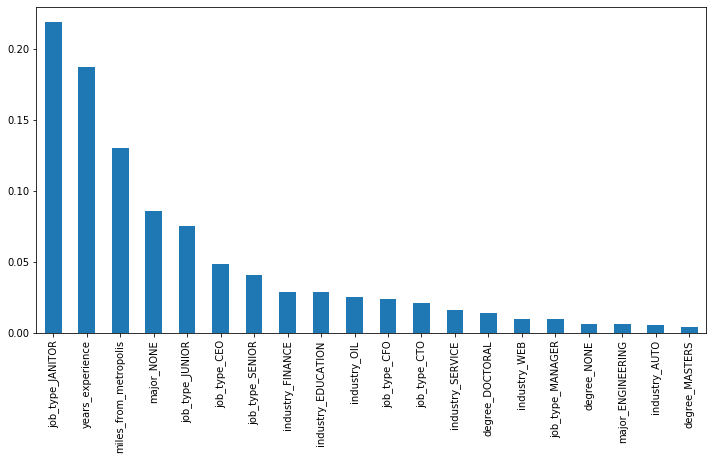

In [67]:
feature_importances = pd.Series(model.feature_importances_, index = train_model_df.columns)
feature_importances.nlargest(20).plot(kind = 'bar', figsize = (12, 6))

### ---- 10 Select best model  ----

In [40]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [41]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [42]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders